In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import lag_plot

In [2]:
df = pd.read_csv("D:\\GitHub\\Market-forecast\\NASDAQ Data\\NASDAQ Training Data - 1st Jan 2016 to 1st Jan 2022.csv", parse_dates=['Date'])
test = pd.read_csv("D:\\GitHub\\Market-forecast\\NASDAQ Data\\NASDAQ Out of Time Data - 1st Jan 2022 to 4th Feb 2022.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,4897.649902,4903.089844,4846.979980,4903.089844,4903.089844,2218420000
1,2016-01-05,4917.839844,4926.729980,4872.740234,4891.430176,4891.430176,1927380000
2,2016-01-06,4813.759766,4866.040039,4804.689941,4835.759766,4835.759766,2168620000
3,2016-01-07,4736.399902,4788.020020,4688.169922,4689.430176,4689.430176,2552590000
4,2016-01-08,4722.020020,4742.569824,4637.850098,4643.629883,4643.629883,2288750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,7359.157905,7404.308974,7309.730950,7361.233510,7361.233510,2.432290e+09
std,1903.792812,1920.191046,1883.794131,1904.010064,1904.010064,9.582915e+08
min,4218.810059,4293.220215,4209.759766,4266.839844,4266.839844,1.494100e+08
25%,5877.054932,5904.620118,5859.495117,5879.940185,5879.940185,1.857675e+09
50%,7293.649902,7350.069824,7235.049805,7298.279785,7298.279785,2.095180e+09
75%,8124.429931,8158.094971,8073.864990,8118.175049,8118.175049,2.521720e+09
max,12965.389648,12973.330078,12857.759766,12899.419922,12899.419922,7.693430e+09


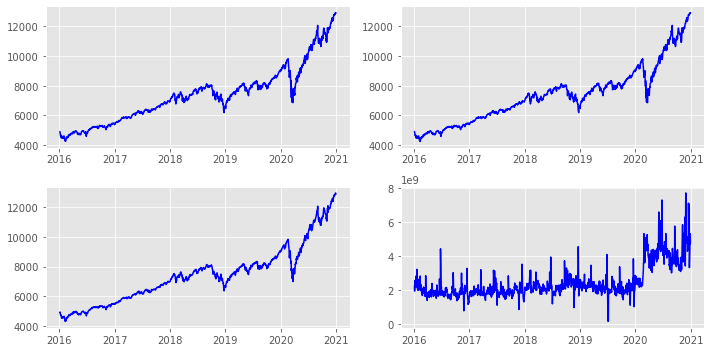

In [6]:
figure,axes = plt.subplots(2,2,figsize=(10,5))

axes[0,0].plot(df['Date'],df['Close'], color='blue')
# plt.show()

axes[0,1].plot(df['Date'],df['Adj Close'], color='blue')
# plt.show()

axes[1,0].plot(df['Date'],df['High'], color='blue')

axes[1,1].plot(df['Date'],df['Volume'], color='blue')

plt.tight_layout()

plt.show()


<AxesSubplot:>

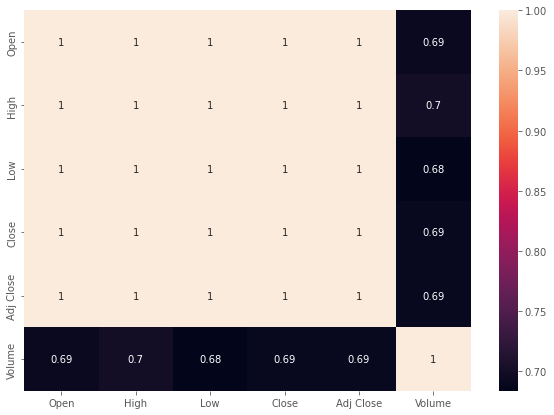

In [7]:
correlation = df.corr()

plt.figure(figsize=(10,7))

sns.heatmap(correlation, annot = True)

Through plots and through the heatmap, we can see that Open, Close, High, Low, and Adj Close are exactly correlated.

In [8]:
X_train = df[:900]
X_test = df[900:]

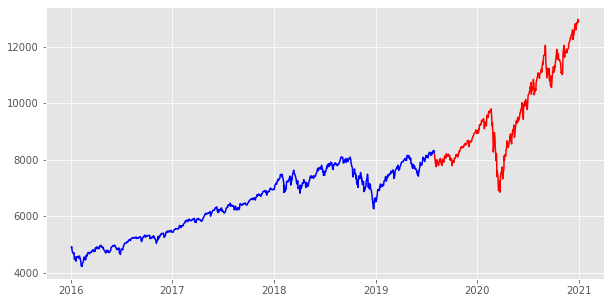

In [9]:
plt.figure(figsize=(10,5))
plt.plot(X_train['Date'],X_train['Open'],color='blue')
plt.plot(X_test['Date'],X_test['Open'],color='red')
plt.show()

<Figure size 720x360 with 0 Axes>

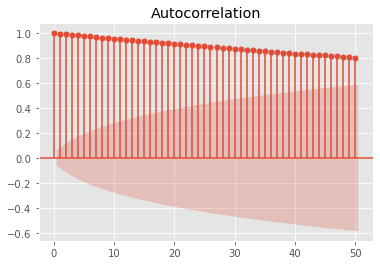

In [10]:
plt.figure(figsize=(10,5))
plot_acf(X_train['Open'],lags=50)
plt.show()

<Figure size 720x360 with 0 Axes>

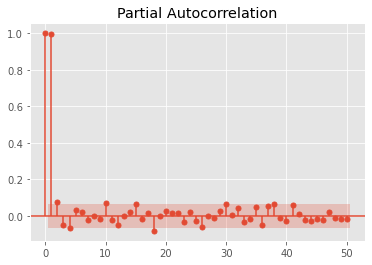

In [11]:
plt.figure(figsize=(10,5))
plot_pacf(X_train['Open'], lags=50)
plt.show()

Text(0.5, 1.0, 'NASDAQ Autocorrelation plot')

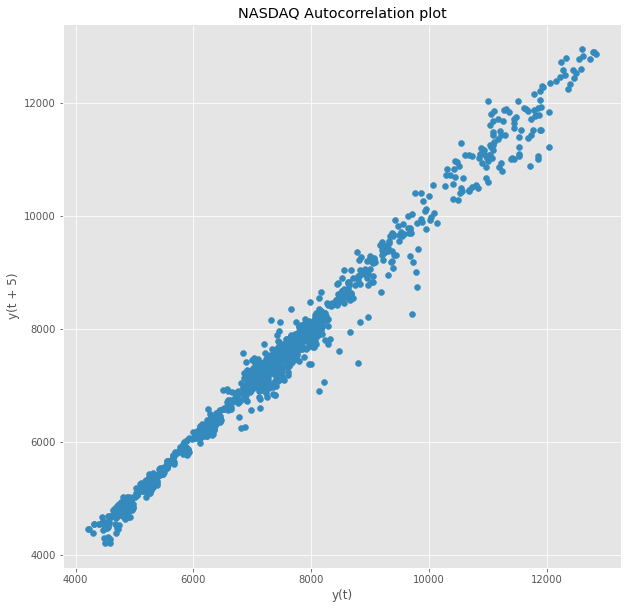

In [12]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('NASDAQ Autocorrelation plot')